In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Output dataframes instead of arrays
set_config(transform_output="pandas")

sacramento = pd.read_csv(r"/Users\Joanne\LCR\01_materials\notebooks\dataset\sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


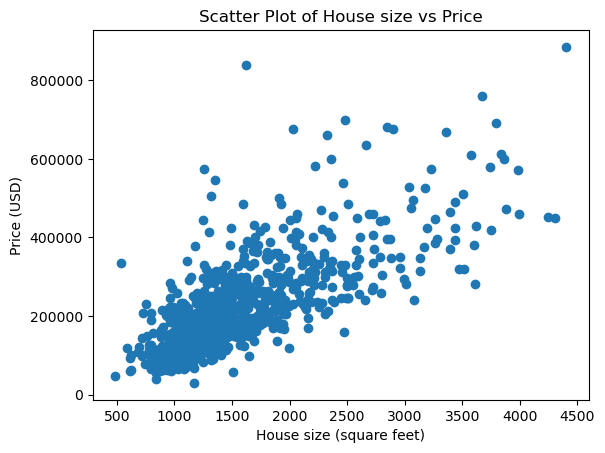

In [8]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [9]:
# first let's apply random seed to ensure each time we run this cell block we get the same random listings
np.random.seed(10)
small_sacramento = sacramento.sample(30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


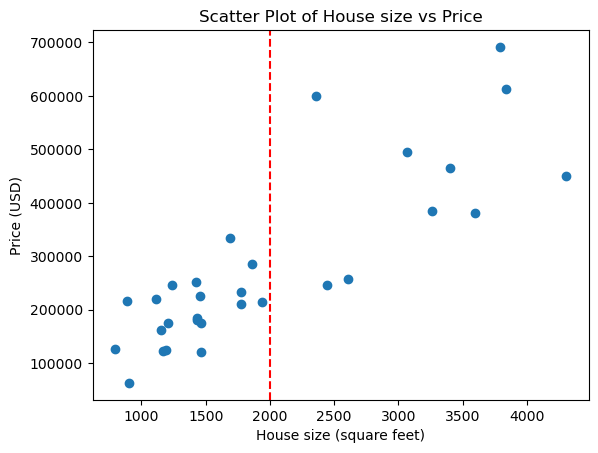

In [10]:
# looking at 5 nearest neighbors to predict price of 2,000 sqft house
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [12]:
# let's find and label the 5 nearest neighbors
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()
# created new column called DIST and takes abs value 
# so that distance differenc either neg or pos considered the same

In [13]:
# Find the 5 rows with the smallest distances (closest to 2000 square feet)
nearest_neighbors = small_sacramento.nsmallest(5, "dist")

# Display the 5 nearest neighbors
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


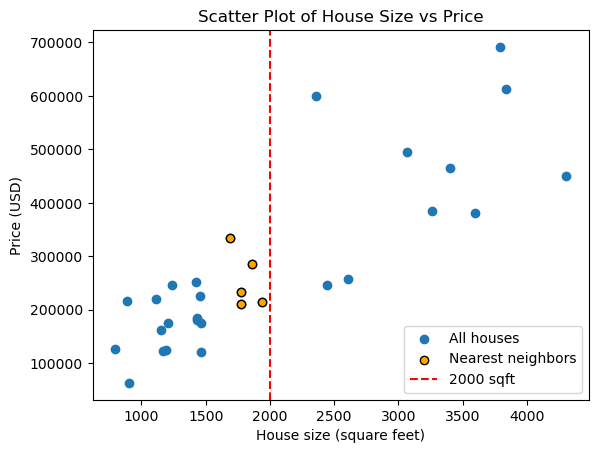

In [14]:
# label and plot these 5 nearest neighbors
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [ ]:
# now that we have our 5 nearest neighbours 
# we can PREDICT the house price for our new observation
# takes the mean of those 5 to come up w/ our prediction
prediction = nearest_neighbors["price"].mean()
prediction

# the predicted price is $255k

255630.0

In [16]:
# but we didn't select the optimal value of k 
# let's redo the analysis on entire dataset to tune model on best value of k

In [18]:
# so let's tune the model to use optimal value of k
# first need to split data into train and test set
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size = 0.75,
    random_state = 42
)

# note that shuffle / stratify is not necessarily needed as we did that for classification
# can use random STATE instead of random seed to ensure reproducability


In [20]:
# now let's split TRAINING data into X and y
X_train = sacramento_train[["sq__ft"]] # predictor variable
y_train = sacramento_train["price"] # response variable

In [ ]:
# initialize knn but this time using knn REGRESSOR instead of knn classifier
knn_regressor = KNeighborsRegressor()

# set up parameter grid
param_grid = {
    "n_neighbors" : range(1,201,3)
    # looks at neighbours of 1 up to 200 (not including 201)
    # step / internal of 3 - increases by increments of 3 thru each iteration
    # if we don't specify 3, it will default to be 1
}

# why are we using 1 to 200?
# simply based on INTUITION - goal is to explore a sufficiently broad range
# to cover as many possibilities as we can while still being practical
# and minimizing computational load
# the step of 3 is a practical choice as it reduces computational load while still doing good test
# testing step of 1 would take more time and wouldn't give siginificantly more value add over step of 3

In [ ]:
# now that we've defined our parameter grid...
# let's initialize grid search
sacr_gridsearch = GridSearchCV(
    estimator = knn_regressor,
    param_grid = param_grid,
    cv = 5, # number of folds
    scoring = "neg_root_mean_squared_error" # can swap this out for r-squared as well
    # scoring refers to RMSE because...
    # by default model wants to MAXIMIZE SCORES
    # RMSE represents error b/w ACTUAL and PREDICTOR -lower is better
    # in this case we want the SMALLER RMSE = better
    # so we make it negative - maximize the NEGATIVES hence neg in neg_rmse = better
)

# only need to do the negative thing if its RMSE

In [24]:
# now that we've init grid search
# now let's fit it to our training data
sacr_gridsearch.fit(X_train, y_train)
# it's basically trying diff values of k, in increments of 3
# does it for 5 diff folds
# from there, it picks the value of K that resullts in best performance
# best performance = lowest RMSE
# we can retrieve results using CV results

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [25]:
# put results into pandas dataframe to make it easier to work w
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002973,0.000884,0.003865,0.001361,1,{'n_neighbors': 1},-111432.646994,-124930.376771,-111553.640165,-121189.571040,-110534.126317,-115928.072257,5952.545896,67
1,0.002221,0.000729,0.002052,0.000669,4,{'n_neighbors': 4},-84191.452465,-96768.557437,-99395.447194,-91776.634858,-96991.842965,-93824.786984,5417.090443,50
2,0.002366,0.000861,0.002784,0.001171,7,{'n_neighbors': 7},-82055.054082,-94969.980001,-97268.515757,-88221.977923,-90245.964227,-90552.298398,5335.745149,32
3,0.002067,0.000366,0.002293,0.000589,10,{'n_neighbors': 10},-79700.428498,-94364.712988,-95672.079987,-84119.947681,-88172.348589,-88405.903549,6041.754570,19
4,0.002294,0.000815,0.002797,0.000555,13,{'n_neighbors': 13},-77034.701093,-92991.526184,-96360.545374,-84692.931752,-84919.254540,-87199.791789,6815.832448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.002725,0.001108,0.004848,0.000382,187,{'n_neighbors': 187},-89404.692337,-103880.184049,-110873.710254,-98278.819705,-78553.282689,-96198.137807,11280.135742,62
63,0.002327,0.000361,0.005053,0.000884,190,{'n_neighbors': 190},-89807.967415,-104221.691818,-111088.875603,-98698.022523,-78654.732762,-96494.258024,11318.372825,63
64,0.002147,0.000355,0.004851,0.001082,193,{'n_neighbors': 193},-90255.812044,-104469.469062,-111371.637819,-99100.345423,-78654.579110,-96770.368691,11388.795184,64
65,0.002957,0.000852,0.005258,0.000787,196,{'n_neighbors': 196},-90612.174931,-104531.594900,-111725.067577,-99524.332322,-78755.965603,-97029.827067,11433.017471,65


In [ ]:
# only need to do this for RMSE - not all scoring methods
# get the actual RMSE by converting the neg values to positive
results["mean_test_score"] = results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002973,0.000884,0.003865,0.001361,1,{'n_neighbors': 1},-111432.646994,-124930.376771,-111553.640165,-121189.571040,-110534.126317,115928.072257,5952.545896,67
1,0.002221,0.000729,0.002052,0.000669,4,{'n_neighbors': 4},-84191.452465,-96768.557437,-99395.447194,-91776.634858,-96991.842965,93824.786984,5417.090443,50
2,0.002366,0.000861,0.002784,0.001171,7,{'n_neighbors': 7},-82055.054082,-94969.980001,-97268.515757,-88221.977923,-90245.964227,90552.298398,5335.745149,32
3,0.002067,0.000366,0.002293,0.000589,10,{'n_neighbors': 10},-79700.428498,-94364.712988,-95672.079987,-84119.947681,-88172.348589,88405.903549,6041.754570,19
4,0.002294,0.000815,0.002797,0.000555,13,{'n_neighbors': 13},-77034.701093,-92991.526184,-96360.545374,-84692.931752,-84919.254540,87199.791789,6815.832448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.002725,0.001108,0.004848,0.000382,187,{'n_neighbors': 187},-89404.692337,-103880.184049,-110873.710254,-98278.819705,-78553.282689,96198.137807,11280.135742,62
63,0.002327,0.000361,0.005053,0.000884,190,{'n_neighbors': 190},-89807.967415,-104221.691818,-111088.875603,-98698.022523,-78654.732762,96494.258024,11318.372825,63
64,0.002147,0.000355,0.004851,0.001082,193,{'n_neighbors': 193},-90255.812044,-104469.469062,-111371.637819,-99100.345423,-78654.579110,96770.368691,11388.795184,64
65,0.002957,0.000852,0.005258,0.000787,196,{'n_neighbors': 196},-90612.174931,-104531.594900,-111725.067577,-99524.332322,-78755.965603,97029.827067,11433.017471,65


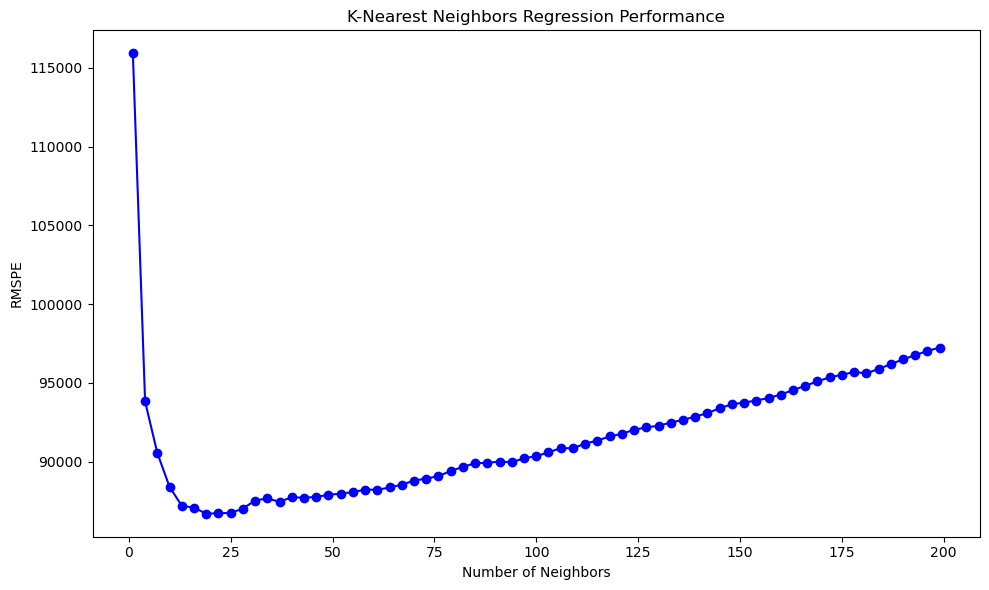

In [28]:
# visualizing this
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [ ]:
# can easily extract best parameter using best_params
sacr_gridsearch.best_params_

# matches our visualization plot above - best k = 19
# scikit learn AUTOMATICALLY retains the model w the best k 
# which is 19

{'n_neighbors': 19}

In [31]:
# now let's evaluate model on unseen data
# so we do this by testing it on the test dataset
# using predict function

# make predictions on test set
# creating new col called predicted
sacramento_test["predicted"] = sacr_gridsearch.predict(
    sacramento_test[["sq__ft"]]
)

In [ ]:
# let's find our RMSPE 
# calculating on diff between actual (aka true) and the prediction
rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
) ** (1/2) # putting it in square root
rmspe

# this tells us that on average, our PREDICTED values will deviate from the ACTUAL values by roughly $74k
# some ppl may think thats a lot, others not really - depends on who you are
# if you're an individual homebuyer - 74k is a lot
# but if i'm a million dollar real estate corp - 74k is nothing

74244.70520282978

In [ ]:
# we can find the r squared aka coefficient of determination
# tells us how much variation in RESPONSE variable can be explained by the PREDICTOR variable
# scikit learn has r2 function built in
r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)
r2
# this tells us that house size ALONE is able to explain rouhgly 50% of the varition in house prices
# this is not bad - 50% is acc quite substantial for only 1 predictor variable

0.49520697046011675

c:\Users\Joanne\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


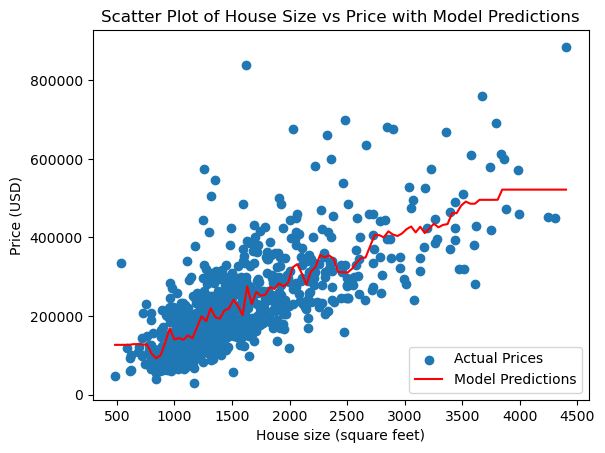

In [ ]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();

# plot helps us assess how well model is predicting data
# shows the average house price for context as well 
# looks like average house prices are 400-500k, so avg diff of 74k is better contextualized now

In [47]:
# let's try to do it by scoring on r-squared instead

# both RMSE and r-squared are commonly used
# r-squared more commonly used for linear regression
# let's initialize grid search using r2
sacr_gridsearch = GridSearchCV(
    estimator = knn_regressor,
    param_grid = param_grid,
    cv = 5, # number of folds
    scoring = "r2" # swapped this out for r-squared as well
)

In [ ]:
# refit model using new scoring method
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)}, scoring='r2')

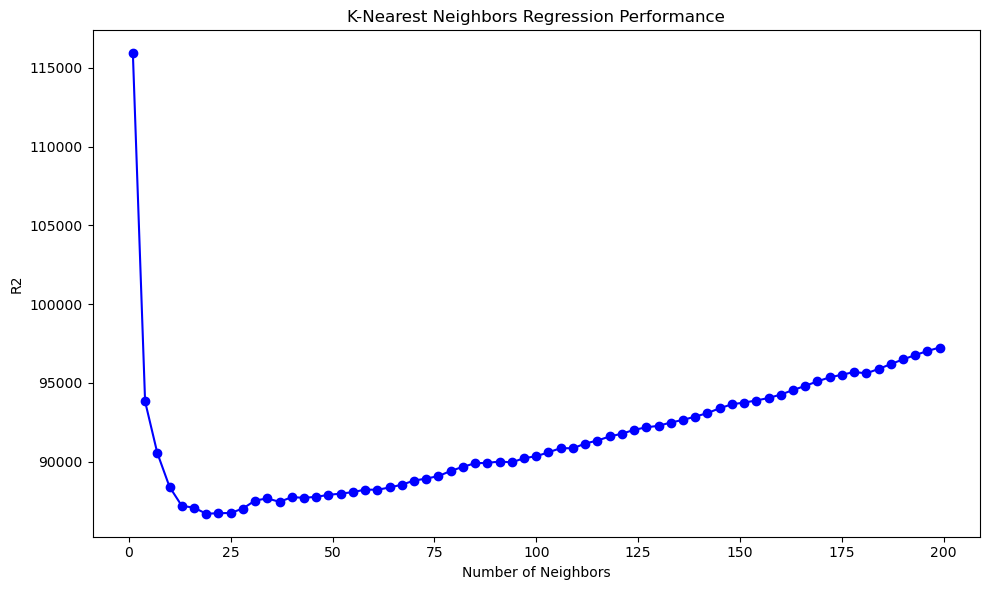

In [51]:
# plot for r2
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [52]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002316,0.001127,0.001108,0.000204,1,{'n_neighbors': 1},0.187740,0.067581,0.339399,0.115179,-0.285536,0.084873,0.206778,67
1,0.001137,0.000451,0.001645,0.000509,4,{'n_neighbors': 4},0.536333,0.440573,0.475550,0.492555,0.010167,0.391036,0.192912,61
2,0.001302,0.000394,0.001726,0.000774,7,{'n_neighbors': 7},0.559566,0.461175,0.497755,0.531102,0.143067,0.438533,0.151353,40
3,0.000976,0.000071,0.001363,0.000477,10,{'n_neighbors': 10},0.584480,0.468022,0.514106,0.573693,0.181994,0.464459,0.147378,24
4,0.001450,0.000351,0.001227,0.000402,13,{'n_neighbors': 13},0.611811,0.483391,0.507087,0.567865,0.241241,0.482279,0.128701,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001028,0.000633,0.002928,0.000249,187,{'n_neighbors': 187},0.477134,0.355326,0.347428,0.418105,0.350738,0.389746,0.050868,62
63,0.001141,0.000234,0.003038,0.000351,190,{'n_neighbors': 190},0.472406,0.351080,0.344892,0.413130,0.349060,0.386114,0.049952,63
64,0.001426,0.000390,0.002558,0.000419,193,{'n_neighbors': 193},0.467131,0.347991,0.341553,0.408336,0.349062,0.382815,0.048611,64
65,0.001154,0.000456,0.002856,0.000206,196,{'n_neighbors': 196},0.462915,0.347215,0.337368,0.403262,0.347383,0.379629,0.047690,65


In [ ]:
sacr_gridsearch.best_params_

# so using r2 as the scoring method, the best k is 25

{'n_neighbors': 25}

In [ ]:
# can use either k = 19 or 25 - small difference

In [ ]:
# extra after class
# can use weights to put more or less weight on the neighbours with larger or smaller differences from the new observations
model = KNeighborsRegressor(n_neighbors=5, weights="distance")

In [1]:
# CLASS 2 content (Wed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

In [ ]:
# Output dataframes instead of arrays
set_config(transform_output="pandas")

# no need to re-import sacramento dataset since we already have it

In [6]:
# Split the sacramento dataset into 75% training data and 25% test data
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size=0.75, random_state=42
)

In [9]:
# fit the linear regression model
lm = LinearRegression()
lm.fit(
   sacramento_train[["sq__ft"]],  # A single-column data frame (square footage)
   sacramento_train["price"]  # A series (house prices)
)

# we put it into a pandas dataframe to make it easier to look at and work with
# Make a dataframe containing b_1 (slope) and b_0 (intercept) coefficients
pd.DataFrame({
    "slope": [lm.coef_[0]], 
     "intercept": [lm.intercept_]
    })

   # lm.coef_[0] gives the slope b_1 (change in price per unit change in square footage)
   # lm.intercept_ gives the intercept b_0 (the predicted price when square footage is 0)

,slope,intercept
0,139.614833,7069.127004


In [10]:
# this now gives us the line of best fit
# to put it into an equation it would look like
# house price = 7069 + 139(house size)

# now let's test it on our model
sacramento_test["predict"] = lm.predict(sacramento_test[["sq__ft"]])

In [ ]:
# now let's calculate our RMSPE
rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predict"]
)**(1/2)
rmspe

# this means model is roughly $72.5k off from the actual price
# means different things depending on who you are

72549.85422128307

In [12]:
# looking at r2 score now
r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predict"]
)
r2

0.5179906495015955

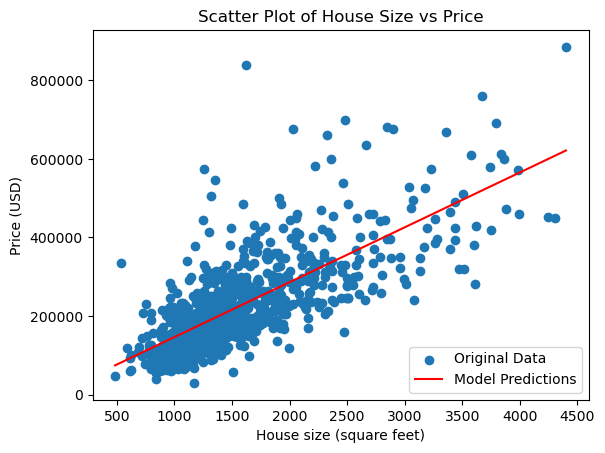

In [13]:
# provided code for graph
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# cross validation now
# not required for hyper tuning 
returned_dictionary = cross_validate(
    estimator=lm,
    cv=5,    # setting up the cross validation number
    X= sacramento[["sq__ft"]],
    y= sacramento["price"],
    scoring="neg_root_mean_squared_error" #or scoring="r2"
)

# putting into pandas dataframe to make it easier to work with and use
cv_5_df = pd.DataFrame(returned_dictionary)    # Converting it to pandas DataFrame

cv_5_df


,fit_time,score_time,test_score
0,0.002528,0.002011,-81369.919847
1,0.004546,0.001513,-97590.236340
2,0.001010,0.001007,-61790.733828
3,0.001014,0.002532,-92026.283010
4,0.002010,0.001005,-75474.947490


In [15]:
# looking at cross validation (CV) metrics
cv_5_metrics = cv_5_df.agg(["mean", "sem"])
cv_5_metrics

,fit_time,score_time,test_score
mean,0.002222,0.001613,-81650.424103
sem,0.000651,0.000296,6302.216095


In [16]:
# Multivariable Linear Regression (using both square footage and number of bedrooms as predictors)
mlm = LinearRegression()

mlm.fit(
    sacramento_train[["sq__ft", "beds"]],  # Two predictors: square footage and number of bedrooms
    sacramento_train["price"]  # Target variable: house prices
)

# Comparison: This is how simple linear regression would look, using only square footage
# lm.fit(
#    sacramento_train[["sq__ft"]],  # Single predictor: square footage
#    sacramento_train["price"]  # Target variable: house prices
# )

LinearRegression()

In [17]:
mlm.coef_

array([   167.62705043, -30687.56006942])

In [18]:
mlm.intercept_

62336.77007332345

In [19]:
sacramento_test["predict"] = mlm.predict(sacramento_test[["sq__ft","beds"]])

In [22]:
mlm_rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predict"]
)**(1/2)
mlm_rmspe

74441.52046148347

In [23]:
mlm.coef_

array([   167.62705043, -30687.56006942])

In [25]:
# putting it into a dataframe to make it easier to read
mlm_summary = pd.DataFrame({
    "slope" : [mlm.coef_],
    "intercept" : [mlm.intercept_],
    "predictors" : ["sq__ft,beds"]
})
mlm_summary

,slope,intercept,predictors
0,"[167.62705043214942, -30687.56006942047]",62336.770073,"sq__ft,beds"


In [26]:
mlm.intercept_

62336.77007332345

In [27]:
mlm_r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predict"]
)
mlm_r2

0.4925271118728288

In [28]:
returned_dictionary_mlm = cross_validate(
    estimator=mlm, 
    cv=5,    # setting up the cross validation number
    X=sacramento[["sq__ft", "beds"]],
    y=sacramento["price"],
    scoring="neg_root_mean_squared_error" 
)

In [ ]:
# converting to pandas dataframe
cv_5_df_mlm = pd.DataFrame(returned_dictionary_mlm)    # Converting it to pandas DataFrame
cv_5_df_mlm["test_score"] = cv_5_df_mlm["test_score"].abs()

cv_5_df_mlm

# test scores represent the negative rmspe across the 5 folds
# we take the abs value bc we know rmspe cannot be negative

,fit_time,score_time,test_score
0,0.005070,0.001014,79862.104410
1,0.002543,0.000993,95393.067119
2,0.002535,0.000996,61298.854877
3,0.002025,0.002012,92691.983589
4,0.002018,0.002014,73940.758792


In [ ]:
# hint for assig2
mpg_train.select_dtypes(include=[float, int]).drop(columns=['mpg'])

In [ ]:
# one hot encoding is to predict on categorical variables
sacramento_encoded = pd.get_dummies(sacramento, columns=['type'], drop_first=False)
sacramento_encoded

# if we did drop_first=False it would also show the type_Condo column

# any time we have categorical variable we do onehot encoding to assign it binary values
# we're dropping the first column (aka Condo in this case)
# if there's a 1 or True for residential - it's residential
# if both MF and Residential is 0 - this means it's Condo
# in this case condo is the REFERENCE CATEGORY - we're interpreting the type relative to Condo

# if we want to change refernece column
sacramento_encoded = sacramnto_encoded.drop(columns=["type_Multi-Family"])
# so the beta coefficient change would be relative to the reference category multi family in this case

# we always drop one to avoid multicollinearity

# the formula that it would be writing is 
# house_price = 2521 + 134(house size) - 53699(MultiFamily) + 15492(Residential)

# slope = m = beta 1

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767,False,False,True
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916,False,False,True
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231,False,False,True
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522,False,False,True
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043,False,False,True
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352,False,False,True
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224,False,False,True
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010,False,False,True


In [32]:
mlm = LinearRegression()

In [33]:
mlm.fit(sacramento_encoded[["sq__ft", "type_Multi-Family", "type_Residential"]], sacramento_encoded["price"])

LinearRegression()

In [34]:
mlm.coef_

array([   134.69626636, -53699.75640571,  15492.85991368])

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966


In [ ]:
# office hours notes
# for SIMPLE LINEAR REGRESSION
# y = mx + b
# y = b1(x) + b0
# y = slope(x) + intercept
# house price = 7069 + 139(house size)
# so now if we give it any house size, it will predict the house size

# for MULTI LINEAR REGRSSION (MLM)


In [37]:
# CLASS 3 - clustering
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [38]:
# Output dataframes instead of arrays
set_config(transform_output="pandas")

penguins = pd.read_csv("dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [39]:
# Grabbing the minimum and maximum values for our features 
min_max_values = penguins.agg(['min', 'max'])
min_max_values

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [40]:
#First, lets make a copy of the original data so that we don’t accidentally overwrite it while pre-processing.

penguins_copy = penguins.copy()

scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)

# Convert the standardized data back to a DataFrame
standardized_penguins = pd.DataFrame(standardized_penguins, columns=standardized_penguins.columns)

standardized_penguins


,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


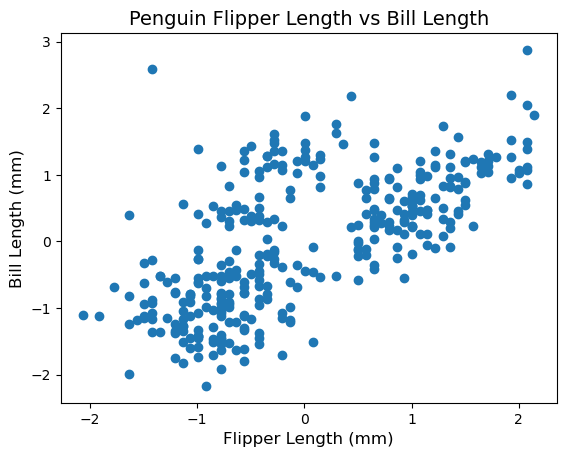

In [41]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)

# Visualizing the clusters to show how datapoints have been grouped
clusters = kmeans.fit(standardized_penguins)

c:\Users\Joanne\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
# First let's assign labels to our dataset
